In [2]:
# Loading the Packages

%reload_ext autoreload
%autoreload 2

import os
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns

from tifffile import tifffile
from scipy import ndimage

# from starmap.obj import STARMapDataset, load_data
# import starmap.analyze as anz
# import starmap.viz as viz
# import starmap.sc_util as su
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.neighbors import NearestNeighbors
from tqdm import tqdm
from anndata import AnnData
from sklearn.cluster import AgglomerativeClustering


read data

In [3]:
pwd

'L:\\mCNS-atlas\\Tissue_domain'

In [4]:
adata=sc.read_h5ad('L:\\test\\DAPI_image_extraction\\input_data\\starmap\\20220313_adata_final.h5ad')
# adata.obs.loc[np.sort(adata.obs.index.astype('int')).astype('str'),:].to_csv('pd_tissue.csv')

In [9]:
rank_colors=pd.read_csv('J:\\ClusterMap2\\Celltyping\\CELLTYPING_CNS_all\\output_plot\\20220125_Combined_Final_Manual_Annotation.csv')
### choose column for cell type colors
color_name='Color_white7'

rank_colors_5=rank_colors.loc[rank_colors['Rank']==5,:].copy()

rank5_color_dict={}
for idx in np.arange(rank_colors_5.shape[0]):
    h=list(rank_colors_5[color_name])[idx].lstrip('#')
    rank5_color_dict[list(rank_colors_5['Refined name'])[idx]]=list(int(h[i:i+2], 16)/255 for i in (0, 2, 4))

In [10]:
sample_name = {
    'well01brain',
    'well01OB',
    'well03',
    'well04',
    'well05',
    'well06',
    'well07',
    'well08',
    'well09',
    'well10',
    'well11',
    'well1_5',
    'well2_5',
    'well3_5',
    'well7_5',
    'well10_5',
    'sagittal1',
    'sagittal2',
    'sagittal3'
}

choose a sample

In [11]:
sample='well06'
print(sample)
adata_sample=adata[adata.obs['sample']==sample,:]
pd_sample=adata_sample.obs

well06


plot on grey cells

(-1079.4621951219515, 28399.974390243904, -1689.1703125000001, 35472.5765625)

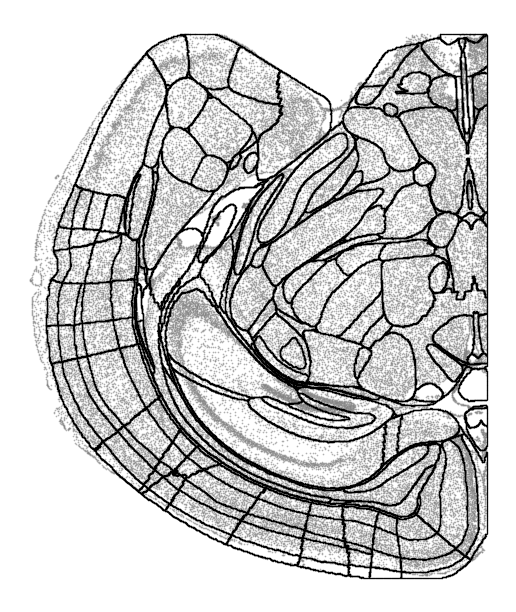

In [14]:
plt.figure(figsize=(int(max(pd_sample['row'])/3000),int(max(pd_sample['col'])/3000)))

### plot cells
plt.scatter(pd_sample['row'],pd_sample['col'],s=max(pd_sample['row'])/48000,c='grey',alpha=0.5)

### plot boundary
boundary_size=0.03
image04 = tifffile.imread('J:\\ClusterMap2\\ccf\\AP_histology-master_sagittal\\slices\\annotation\\ccf_'+sample+'_celltypemap-rgb-1.tif');
sx = ndimage.sobel(image04,axis=0,mode='constant')
sy = ndimage.sobel(image04,axis=1,mode='constant')
sobel=np.hypot(sx,sy)
out_tpl04 = np.nonzero(sobel)

indices=np.where(image04[out_tpl04[0],out_tpl04[1]]>1)
out_tpl04_new=[out_tpl04[0][indices],out_tpl04[1][indices]]

plt.scatter(out_tpl04_new[1]*10,out_tpl04_new[0]*10,c='k',s=boundary_size)

plt.axis('off')

plot on colorful cells

(-1353.0, 28413.0, -1689.1703125000001, 35472.5765625)

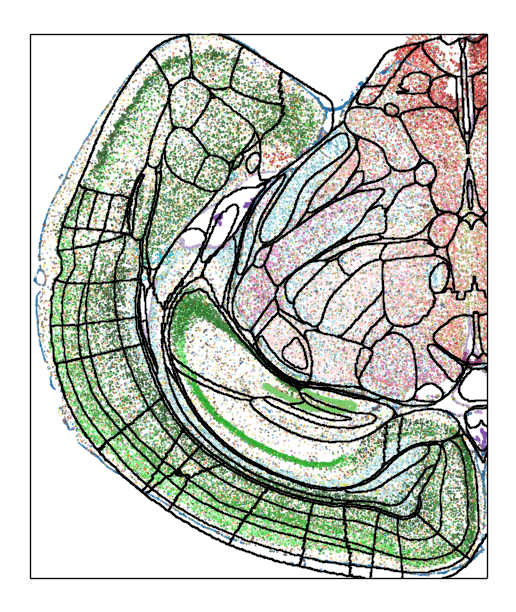

In [15]:
plt.figure(figsize=(int(max(pd_sample['row'])/3000),int(max(pd_sample['col'])/3000)))

### plot cells
plt.scatter(pd_sample['row'],pd_sample['col'],s=max(pd_sample['row'])/20000,
            alpha=0.6,
            c=[rank5_color_dict[i] for i in pd_sample['Rank5_Symbol']],
          )


### plot boundary
boundary_size=0.03
image04 = tifffile.imread('J:\\ClusterMap2\\ccf\\AP_histology-master_sagittal\\slices\\annotation\\ccf_'+sample+'_celltypemap-rgb-1.tif');
sx = ndimage.sobel(image04,axis=0,mode='constant')
sy = ndimage.sobel(image04,axis=1,mode='constant')
sobel=np.hypot(sx,sy)
out_tpl04 = np.nonzero(sobel)

plt.scatter(out_tpl04[1]*10,out_tpl04[0]*10,c='k',s=boundary_size)

plt.axis('off')
# plt.savefig('.png',dpi=300)